In [1]:
# code modified to https://www.hatarilabs.com/ih-en/how-to-make-a-piper-diagram-in-python-tutorial
%matplotlib inline
import pandas as pd
import numpy as np
import os, math
import matplotlib.pyplot as plt
import imageio

In [2]:
#nos dirigimos al sitio del formato
img = imageio.imread("../Figures/PiperCompleto.png")
img2 = imageio.imread("../Figures/camposp.jpg")

In [3]:
#importamos los datos
datosQuimica = pd.read_excel('../Xls/HatariChem_FormatodeTrabajo.xlsx')
datosQuimica.head()

,Estacion,Este,Norte,Cuenca,Fecha,HCO3,CO3,SO4,Cl,Na,Ca,Mg,K
0,CHA – 01,791048.0,9231754.0,RioChailhuagon,2007-11-11,94.0,94.0,55.40,2.89,4.18,46.2,2.46,0.04
1,CHEX – 01,791699.0,9233982.0,QuebradaAltoChirimayo,2009-05-27,122.0,2.0,9.70,0.40,6.25,27.4,9.06,1.90
2,CHEX – 03,793806.0,9232908.0,QuebradaAltoChirimayo,2003-09-26,640.0,640.0,13.60,14.60,4.79,146.0,10.90,27.30
3,CJEX – 01,788976.0,9231533.0,RioChailhuagon,2003-09-27,195.0,195.0,2.69,4.56,28.60,26.0,9.88,2.81
4,CJEX – 02,789070.0,9231112.0,RioChailhuagon,2009-05-28,205.0,1.0,11.50,0.30,2.45,66.0,9.29,0.54


In [4]:
#diccionario de iones divido valencia
iones = {
'HCO3': 61.0168, 'CO3' : 60/2, 'Cl' : 35.453, 'SO4': 96.06/2,
'Na' : 23, 'Ca' : 40.078/2, 'Mg' : 24.035/2, 'K'  : 39.0983
}

#generamos las columnas de concentraciones equivalentes
for ion in iones.keys():
    datosQuimica[str(ion)+'_meq'] = datosQuimica[ion]/iones[ion]
    
datosQuimica.head()


,Estacion,Este,Norte,Cuenca,Fecha,HCO3,CO3,SO4,Cl,Na,...,Mg,K,HCO3_meq,CO3_meq,Cl_meq,SO4_meq,Na_meq,Ca_meq,Mg_meq,K_meq
0,CHA – 01,791048.0,9231754.0,RioChailhuagon,2007-11-11,94.0,94.0,55.40,2.89,4.18,...,2.46,0.04,1.540559,3.133333,0.081516,1.153446,0.181739,2.305504,0.204701,0.001023
1,CHEX – 01,791699.0,9233982.0,QuebradaAltoChirimayo,2009-05-27,122.0,2.0,9.70,0.40,6.25,...,9.06,1.90,1.999449,0.066667,0.011283,0.201957,0.271739,1.367334,0.753901,0.048595
2,CHEX – 03,793806.0,9232908.0,QuebradaAltoChirimayo,2003-09-26,640.0,640.0,13.60,14.60,4.79,...,10.90,27.30,10.488915,21.333333,0.411813,0.283156,0.208261,7.285793,0.907011,0.698240
3,CJEX – 01,788976.0,9231533.0,RioChailhuagon,2003-09-27,195.0,195.0,2.69,4.56,28.60,...,9.88,2.81,3.195841,6.500000,0.128621,0.056007,1.243478,1.297470,0.822134,0.071870
4,CJEX – 02,789070.0,9231112.0,RioChailhuagon,2009-05-28,205.0,1.0,11.50,0.30,2.45,...,9.29,0.54,3.359730,0.033333,0.008462,0.239434,0.106522,3.293578,0.773039,0.013811


In [5]:
# calcula el error 
antiones = datosQuimica['SO4_meq'] + datosQuimica['HCO3_meq'] + datosQuimica['Cl_meq']+datosQuimica['CO3_meq']
cantiones =datosQuimica['Mg_meq'] +datosQuimica['Na_meq'] +   datosQuimica['Ca_meq'] + datosQuimica['K_meq']
datosQuimica['error'] = (antiones- cantiones)/(antiones + cantiones)
datosQuimica.head()
datosQuimica.to_excel('../Output/datosmeq.xls')

In [6]:
#normalizamos los aniones
datosQuimica['SO4_norm'] = datosQuimica['SO4_meq'] / (datosQuimica['SO4_meq'] +
                            datosQuimica['HCO3_meq']+datosQuimica['CO3_meq']+datosQuimica['Cl_meq']) * 100
datosQuimica['HCO3_CO3_norm'] = (datosQuimica['HCO3_meq']+datosQuimica['CO3_meq']) / (datosQuimica['SO4_meq'] +
                            datosQuimica['HCO3_meq']+datosQuimica['CO3_meq']+datosQuimica['Cl_meq']) * 100
datosQuimica['Cl_norm'] = datosQuimica['Cl_meq'] / (datosQuimica['SO4_meq'] +
                            datosQuimica['HCO3_meq']+datosQuimica['CO3_meq']+datosQuimica['Cl_meq']) * 100

#normalizamos los cationes
datosQuimica['Mg_norm'] = datosQuimica['Mg_meq'] / (datosQuimica['Mg_meq'] +
                            datosQuimica['Ca_meq']+datosQuimica['K_meq']+datosQuimica['Na_meq']) * 100
datosQuimica['Na_K_norm'] = (datosQuimica['K_meq']+datosQuimica['Na_meq']) / (datosQuimica['Mg_meq'] +
                            datosQuimica['Ca_meq']+datosQuimica['K_meq']+datosQuimica['Na_meq']) * 100
datosQuimica['Ca_norm'] = datosQuimica['Ca_meq'] / (datosQuimica['Mg_meq'] +
                            datosQuimica['Ca_meq']+datosQuimica['K_meq']+datosQuimica['Na_meq']) * 100
datosQuimica.head()


,Estacion,Este,Norte,Cuenca,Fecha,HCO3,CO3,SO4,Cl,Na,...,Ca_meq,Mg_meq,K_meq,error,SO4_norm,HCO3_CO3_norm,Cl_norm,Mg_norm,Na_K_norm,Ca_norm
0,CHA – 01,791048.0,9231754.0,RioChailhuagon,2007-11-11,94.0,94.0,55.40,2.89,4.18,...,2.305504,0.204701,0.001023,0.373861,19.520631,79.099806,1.379563,7.601334,6.786646,85.612021
1,CHEX – 01,791699.0,9233982.0,QuebradaAltoChirimayo,2009-05-27,122.0,2.0,9.70,0.40,6.25,...,1.367334,0.753901,0.048595,-0.034360,8.860272,90.644740,0.494988,30.877710,13.120031,56.002258
2,CHEX – 03,793806.0,9232908.0,QuebradaAltoChirimayo,2003-09-26,640.0,640.0,13.60,14.60,4.79,...,7.285793,0.907011,0.698240,0.562707,0.870789,97.862765,1.266445,9.967912,9.962311,80.069778
3,CJEX – 01,788976.0,9231533.0,RioChailhuagon,2003-09-27,195.0,195.0,2.69,4.56,28.60,...,1.297470,0.822134,0.071870,0.484064,0.566842,98.131388,1.301770,23.934373,38.293057,37.772570
4,CJEX – 02,789070.0,9231112.0,RioChailhuagon,2009-05-28,205.0,1.0,11.50,0.30,2.45,...,3.293578,0.773039,0.013811,-0.069749,6.576115,93.191476,0.232409,18.463066,2.874003,78.662931


In [7]:
#funcion de las coordenadas
def coordenada(Ca,Mg,Cl,SO4,Label):
    xcation = 40 + 360 - (Ca + Mg / 2) * 3.6
    ycation = 40 + (math.sqrt(3) * Mg / 2)* 3.6
    xanion = 40 + 360 + 100 + (Cl + SO4 / 2) * 3.6
    yanion = 40 + (SO4 * math.sqrt(3) / 2)* 3.6
    xdiam = 0.5 * (xcation + xanion + (yanion - ycation) / math.sqrt(3))
    ydiam = 0.5 * (yanion + ycation + math.sqrt(3) * (xanion - xcation))
    #print(str(xanion) + ' ' + str(yanion))
    c=np.random.rand(3,1).ravel()
    #c = np.sort(c)
    listagraph=[]
    listagraph.append(plt.scatter(xcation,ycation,zorder=1,c=c, s=60, edgecolors='#4b4b4b',label=Label))
    listagraph.append(plt.scatter(xanion,yanion,zorder=1,c=c, s=60, edgecolors='#4b4b4b'))
    listagraph.append(plt.scatter(xdiam,ydiam,zorder=1,c=c, s=60, edgecolors='#4b4b4b'))
    return listagraph

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

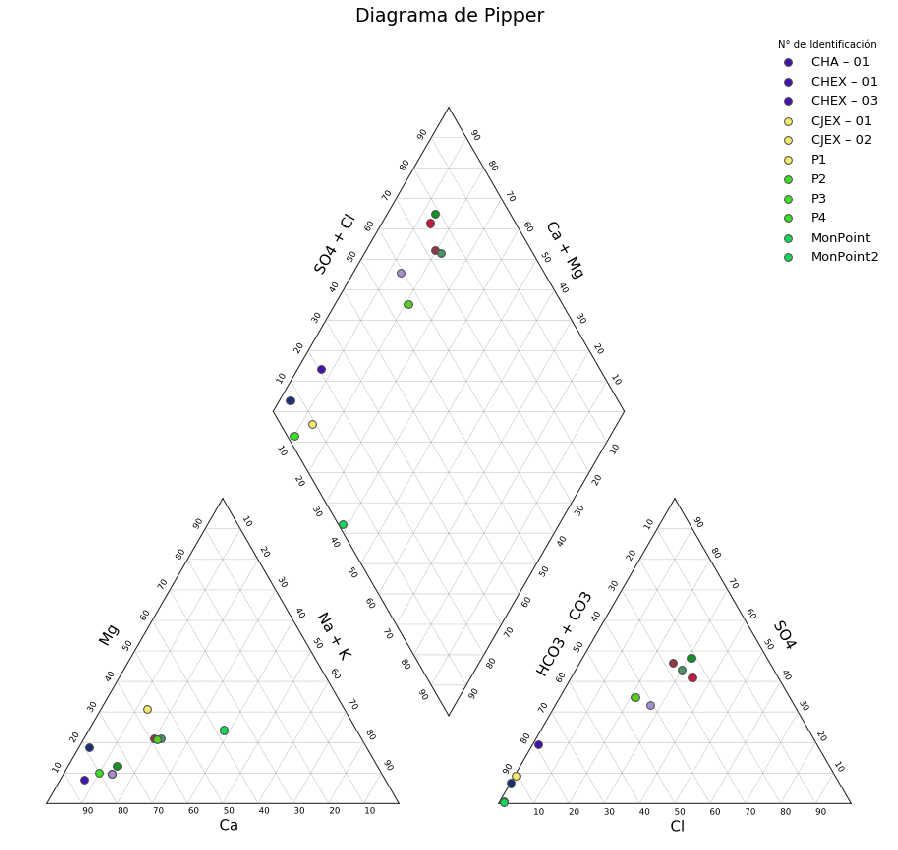

In [8]:
#grafica el diagrama de pipper
plt.figure(figsize=(20,15))
plt.imshow(np.flipud(img),zorder=0)
for index, row in datosQuimica.iterrows():
    coordenada(row['Ca_norm'],row['Mg_norm'],row['Cl_norm'],row['SO4_norm'],index)
plt.ylim(0,830)
plt.xlim(0,900)
plt.axis('off')
plt.title("Diagrama de Pipper", size= 19)
est = datosQuimica['Estacion']
plt.legend((est), loc='upper right', frameon=False, scatterpoints=1, title='N° de Identificación',prop={'size':13})


plt.savefig('../Output/Piper.png')
plt.savefig('../Output/Piper.pdf')
plt.savefig('../Output/Piper.svg')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

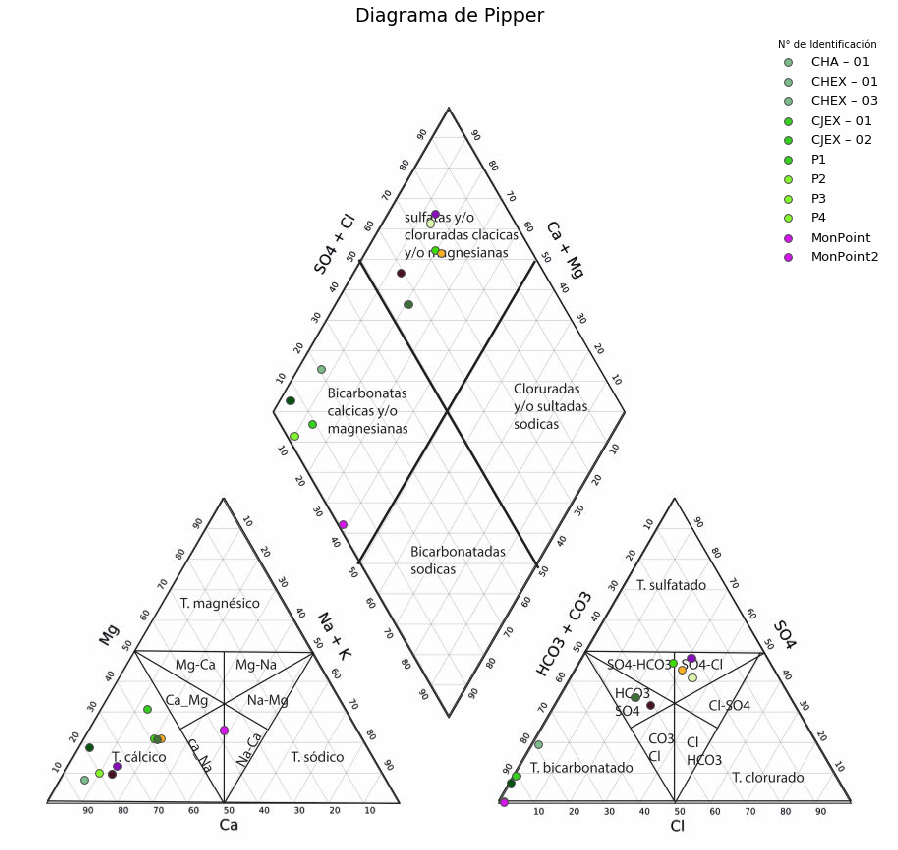

In [9]:
#grafica el diagrama de pipper con campos
plt.figure(figsize=(20,15))
plt.imshow(np.flipud(img2),zorder=0)
for index, row in datosQuimica.iterrows():
    coordenada(row['Ca_norm'],row['Mg_norm'],row['Cl_norm'],row['SO4_norm'],index)
plt.ylim(0,830)
plt.xlim(0,900)
plt.axis('off')
plt.title("Diagrama de Pipper", size= 19)
est = datosQuimica['Estacion']
plt.legend((est), loc='upper right', frameon=False, scatterpoints=1, title='N° de Identificación',prop={'size':13})


plt.savefig('../Output/PiperCampos.png')
plt.savefig('../Output/PiperCampos.pdf')
plt.savefig('../Output/PiperCampos.svg')